# Histology Tissue Classification Project (HTCP)

(C) K. Mader / U. Michelucci 2018-2019

# Overview
The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge
- Classify tiles correctly into one of the eight classes
- Which classes are most frequently confused?
- What features can be used (like texture, see scikit-image) to improve classification?
- How can these models be applied to the much larger 5000x5000 models? 
How can this be done efficiently?

# Acknowledgements
The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, 
    Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels 
providing basic analysis of the data

Content
This data set represents a collection of textures in histological images of 
human colorectal cancer. It contains two files:

    Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
    histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
    to exactly one of eight tissue categories (specified by the folder name). 
    
    Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
    larger histological images of 5000 x 5000 px each. These images contain 
    more than one tissue type. Image format

All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015

# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on  kaggle: https://goo.gl/hkRSke  

# Helper Functions

In [1]:
def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [2]:
def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load the data

In [3]:
%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import *

In [4]:
data = pd.read_csv('data/HTCP_28_28_L.csv')

Let's create an array with labels (not yet one-encoded) and one for the images.

In [5]:
yinput = data['label']
Xinput = data.drop(['label'], axis = 1)

Let's look at the first records of the dataframe

In [6]:
Xinput.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,101,110,154,160,95,44,139,184,164,160,...,128,103,73,72,75,152,130,96,133,159
1,67,66,69,76,80,57,46,67,90,77,...,57,58,65,74,80,81,83,77,75,73
2,127,137,121,140,170,111,128,117,60,105,...,69,90,100,143,119,148,140,193,146,97
3,80,90,101,106,120,100,99,66,63,91,...,154,131,109,97,102,71,93,120,84,62
4,153,141,121,132,110,131,119,99,101,91,...,134,117,121,136,178,192,210,189,149,155


In [7]:
yinput.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

The datasets has 5000 images, each 28x28 in gray

In [8]:
Xinput.shape

(5000, 784)

In [9]:
yinput.shape

(5000,)

## Examples of each class

Let's plot an image of each class

In [10]:
yinput.unique()

array([2, 5, 7, 6, 8, 1, 4, 3], dtype=int64)

In [11]:
def get_random_element_with_label (Xinput, lbls, lbl):
    tmp = lbls == lbl
    subset = Xinput[tmp]
    return subset.iloc[randint(1,subset.shape[0])]

labels_overview = np.empty([10,784])
for i in range (1,9):
    img = get_random_element_with_label(Xinput, yinput, i)
    labels_overview[i,:] = img

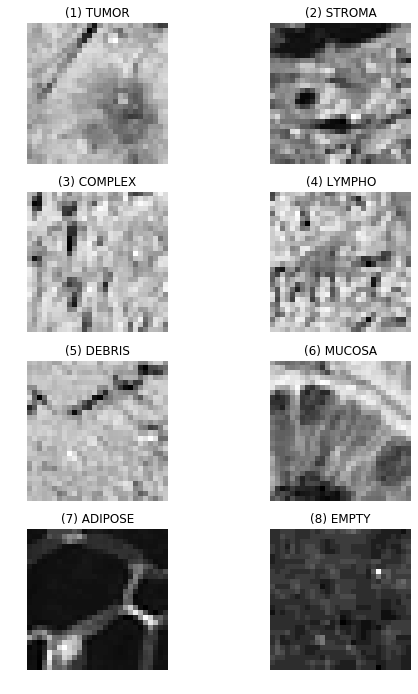

In [12]:
f = plt.figure(figsize=(8,15));
count = 1
for i in range(1,9):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.2)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[i,:].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

In [13]:
total = 0
for i in range(9):
    print ("image", i, "appear", np.count_nonzero(yinput == i), "times")

image 0 appear 0 times
image 1 appear 625 times
image 2 appear 625 times
image 3 appear 625 times
image 4 appear 625 times
image 5 appear 625 times
image 6 appear 625 times
image 7 appear 625 times
image 8 appear 625 times


In [14]:
total = 0
for i in range(9):
    print ("image", i, "makes", np.around(np.count_nonzero(yinput == i)/5000.0*100.0, decimals=1), "% of the 5000 observations")

image 0 makes 0.0 % of the 5000 observations
image 1 makes 12.5 % of the 5000 observations
image 2 makes 12.5 % of the 5000 observations
image 3 makes 12.5 % of the 5000 observations
image 4 makes 12.5 % of the 5000 observations
image 5 makes 12.5 % of the 5000 observations
image 6 makes 12.5 % of the 5000 observations
image 7 makes 12.5 % of the 5000 observations
image 8 makes 12.5 % of the 5000 observations


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ylabels, ylabels_test = train_test_split(Xinput, yinput, test_size=0.2, stratify=yinput, random_state=2018)

In [16]:
train = xtrain.transpose()
labels = ylabels.values.reshape(1, 4000)-1
labels_ = np.zeros((4000, 9))
labels_[np.arange(4000), labels] = 1
labels_ = labels_.transpose()

In [17]:
print(train.shape)
print(labels_.shape)

(784, 4000)
(9, 4000)


In [18]:
test = xtest.transpose()
labels_test = ylabels_test.values.reshape(1, 1000)-1
labels_test_ = np.zeros((1000, 9))
labels_test_[np.arange(1000), labels_test] = 1
labels_test_ = labels_test_.transpose()

In [19]:
print(labels_test_.shape)
print(test.shape)

(9, 1000)
(784, 1000)


## Normalization

In [20]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

In [21]:
import tensorflow as tf

## Random search

In [22]:
def build_model_layers(neuron1,neuron2,neuron3,neuron4,neuron5,neuron6,neuron7,neuron8,neuron9,
                       neuron10,neuron11,neuron12):
    n_dim = 784
    tf.reset_default_graph()

    
    # Number of neurons in the layers
    n1 = neuron1 # Number of neurons in layer 1
    n2 = neuron2 # Number of neurons in layer 2 
    n3 = neuron3
    n4 = neuron4
    n5 = neuron5
    n6 = neuron6
    n7 = neuron7
    n8 = neuron8
    n9 = neuron9
    n10 = neuron10
    n11 = neuron11
    n12 = neuron12
    n13 = 9
    
    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [9, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    W5 = tf.Variable(tf.random_normal([n5,n4], stddev = stddev_f))
    b5 = tf.Variable(tf.constant(0.0, shape = [n5,1]))
    W6 = tf.Variable(tf.random_normal([n6,n5], stddev = stddev_f))
    b6 = tf.Variable(tf.constant(0.0, shape = [n6,1]))
    W7 = tf.Variable(tf.random_normal([n7,n6], stddev = stddev_f))
    b7 = tf.Variable(tf.constant(0.0, shape = [n7,1]))
    W8 = tf.Variable(tf.random_normal([n8,n7], stddev = stddev_f))
    b8 = tf.Variable(tf.constant(0.0, shape = [n8,1]))
    W9 = tf.Variable(tf.random_normal([n9,n8], stddev = stddev_f))
    b9 = tf.Variable(tf.constant(0.0, shape = [n9,1]))
    W10 = tf.Variable(tf.random_normal([n10,n9], stddev = stddev_f))
    b10 = tf.Variable(tf.constant(0.0, shape = [n10,1]))
    W11 = tf.Variable(tf.random_normal([n11,n10], stddev = stddev_f))
    b11 = tf.Variable(tf.constant(0.0, shape = [n11,1]))
    W12 = tf.Variable(tf.random_normal([n12,n11], stddev = stddev_f))
    b12 = tf.Variable(tf.constant(0.0, shape = [n12,1]))
    W13 = tf.Variable(tf.random_normal([n13,n12], stddev = stddev_f))
    b13 = tf.Variable(tf.constant(0.0, shape = [n13,1]))

    
    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    Z5 = tf.nn.relu(tf.matmul(W5, Z4) + b5)
    Z6 = tf.nn.relu(tf.matmul(W6, Z5) + b6)
    Z7 = tf.nn.relu(tf.matmul(W7, Z6) + b7)
    Z8 = tf.nn.relu(tf.matmul(W8, Z7) + b8)
    Z9 = tf.nn.relu(tf.matmul(W9, Z8) + b9)
    Z10 = tf.nn.relu(tf.matmul(W10, Z9) + b10)
    Z11 = tf.nn.relu(tf.matmul(W11, Z10) + b11)
    Z12 = tf.nn.relu(tf.matmul(W12, Z11) + b12)
    Z13 = tf.matmul(W13, Z12) + b13
    y_ = tf.nn.softmax(Z13,0) # n2 x n_obs (9 x None)


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [23]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r,neuron1,neuron2,neuron3,neuron4,neuron5,neuron6,neuron7,neuron8,neuron9,neuron10,
                 neuron11,neuron12, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(neuron1,neuron2,neuron3,neuron4,neuron5,neuron6,neuron7,neuron8,
                                                         neuron9,neuron10,neuron11,neuron12)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: learning_r}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: learning_r}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [24]:
neuron1 = np.random.randint(low=10, high=300.0, size=(20))
neuron2 = np.random.randint(low=10, high=300.0, size=(20))
neuron3 = np.random.randint(low=10, high=300.0, size=(20))
neuron4 = np.random.randint(low=10, high=300.0, size=(20))
neuron5 = np.random.randint(low=10, high=300.0, size=(20))
neuron6 = np.random.randint(low=10, high=300.0, size=(20))
neuron7 = np.random.randint(low=10, high=300.0, size=(20))
neuron8 = np.random.randint(low=10, high=300.0, size=(20))
neuron9 = np.random.randint(low=10, high=300.0, size=(20))
neuron10 = np.random.randint(low=10, high=300.0, size=(20))
neuron11 = np.random.randint(low=10, high=300.0, size=(20))
neuron12 = np.random.randint(low=10, high=300.0, size=(20))

r = -np.random.random([25])*(3-2)-2
learning_ = 10**r
mb_size_ = np.random.randint(low=25, high=80, size = 25)
epochs_ = np.random.randint(low = 40, high = 100, size = (25))

In [25]:
for i in range(0,20):
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = epochs_[i], 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = learning_[i],
                              neuron1 = neuron1[i],
                              neuron2 = neuron2[i],
                              neuron3 = neuron3[i],
                              neuron4 = neuron4[i],                  
                              neuron5 = neuron5[i],                             
                              neuron6 = neuron6[i],                             
                              neuron7 = neuron7[i],                             
                              neuron8 = neuron8[i],                             
                              neuron9 = neuron9[i],  
                              neuron10 = neuron10[i],                             
                              neuron11 = neuron11[i],                             
                              neuron12 = neuron12[i],                                                          
                              debug = False)
    print('epochs:', epochs_[i],'learning', learning_[i],'mb size',mb_size_[i],
          'Neuron1:',neuron1[i],'Neuron2:',neuron2[i],'Neuron3:',neuron3[i],
          'Neuron4:',neuron4[i],'Neuron5:',neuron5[i],'Neuron6:',neuron6[i],
          'Neuron7:',neuron7[i],'Neuron8:',neuron8[i],'Neuron9:',neuron9[i],
          'Neuron10:',neuron10[i],'Neuron11:',neuron11[i],'Neuron12:',neuron12[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

epochs: 94 learning 0.009564139866513399 mb size 55 Neuron1: 196 Neuron2: 43 Neuron3: 90 Neuron4: 84 Neuron5: 141 Neuron6: 193 Neuron7: 124 Neuron8: 86 Neuron9: 141 Neuron10: 97 Neuron11: 194 Neuron12: 133 Acc. Train: 0.5475 Acc. Test 0.516
epochs: 62 learning 0.005105204086965131 mb size 70 Neuron1: 299 Neuron2: 279 Neuron3: 144 Neuron4: 41 Neuron5: 194 Neuron6: 214 Neuron7: 73 Neuron8: 72 Neuron9: 241 Neuron10: 48 Neuron11: 282 Neuron12: 285 Acc. Train: 0.44475 Acc. Test 0.417
epochs: 43 learning 0.002403852957388832 mb size 71 Neuron1: 266 Neuron2: 107 Neuron3: 24 Neuron4: 68 Neuron5: 78 Neuron6: 114 Neuron7: 160 Neuron8: 212 Neuron9: 115 Neuron10: 96 Neuron11: 100 Neuron12: 267 Acc. Train: 0.12575 Acc. Test 0.126
epochs: 44 learning 0.0034903492573710266 mb size 47 Neuron1: 73 Neuron2: 230 Neuron3: 240 Neuron4: 31 Neuron5: 86 Neuron6: 159 Neuron7: 182 Neuron8: 268 Neuron9: 25 Neuron10: 184 Neuron11: 234 Neuron12: 212 Acc. Train: 0.2965 Acc. Test 0.289
epochs: 65 learning 0.00780324